# Mario Kart 64 World Records Data Narrative

### BIOS 512 Final Project: Ally Wardell

This dataset contains world records for the Mario kart racing game on the Nintendo 64. There are a total of 16 individual tracks and world records can be achieved for a single lap or for a complete race, which consists of a total of three laps. This data narrative will examine the average race times for each track, both single and three lap times, changes in race times across various tracks by year, and the ranges between the original world record recorded and the most up to date record. 

In [1]:
library('tidyverse')
library('patchwork')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
mario = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/records.csv", col_types = cols())
drivers = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/drivers.csv", col_types = cols())

In [3]:
mario = mario %>% 
        mutate(year= format(date, format = "%Y"))

I will consider the average race time for the single lap and three lap races separately. I am using the average race time for all world record races as a measure of the length of the race. According to the plot below, the track titled Rainbow Road has the highest average race time. As the list continues, the order of the tracks differ, as the average race time may be higher for Toad's Turnpike in the single lap race but ranked lower in average race time order when considering a three lap race. 

In [4]:
# calculate the average time for each race track, then see which is the fastest; 

mario_singlelap = mario %>% 
         filter(type=="Single Lap") %>% 
         group_by(track) %>% 
         summarize(avg_time = mean(time)) %>%
         arrange(avg_time)

mario_threelap = mario %>% 
         filter(type=="Three Lap") %>% 
         group_by(track) %>% 
         summarize(avg_time = mean(time)) %>%
         arrange(avg_time)

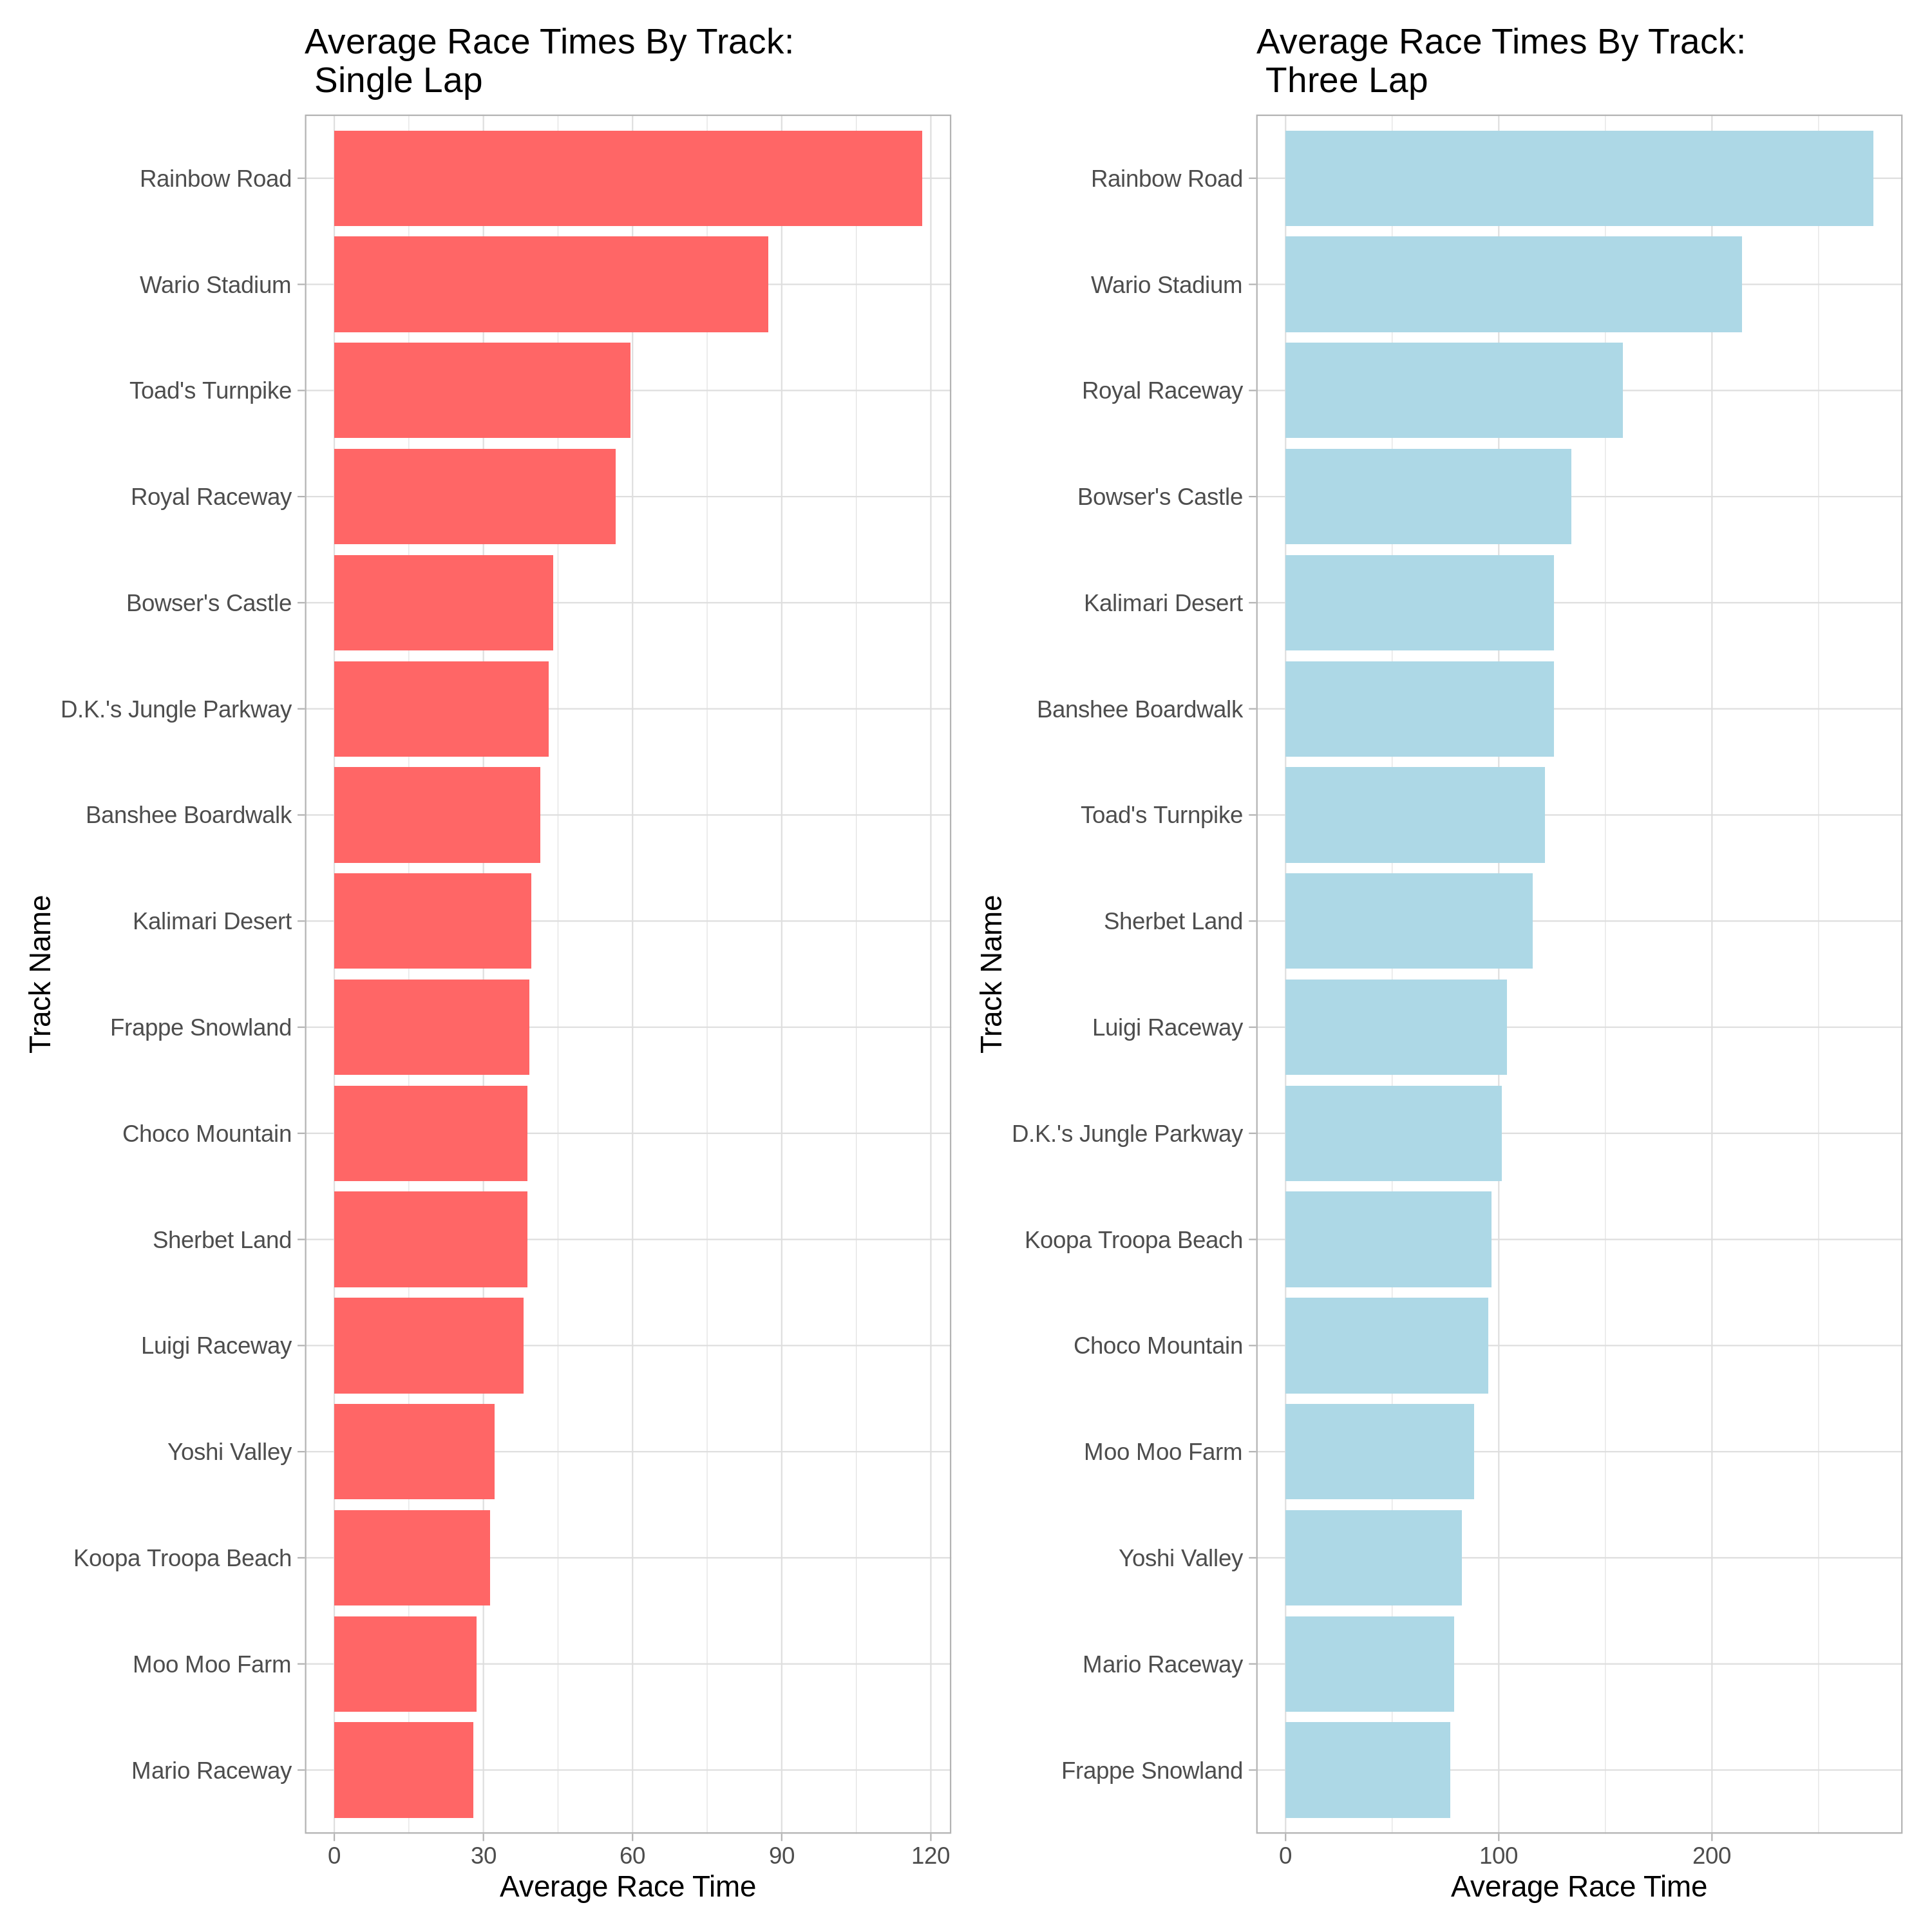

In [5]:
options(repr.plot.res = 300, repr.plot.width = 10, repr.plot.height = 10)

p = ggplot (mario_singlelap, aes(y = fct_reorder(track, avg_time), x = avg_time))

p = p + geom_col(fill = "#FF6666")

p = p + ylab("Track Name") + xlab("Average Race Time") + ggtitle("Average Race Times By Track: \n Single Lap")

p = p + theme_light()

p2 = ggplot (mario_threelap, aes(y = fct_reorder(track, avg_time), x = avg_time))

p2 = p2 + geom_col(fill = "light blue")

p2 = p2 + ylab("Track Name") + xlab("Average Race Time") + ggtitle("Average Race Times By Track: \n Three Lap")

p2 = p2 + theme_light()

p + p2

The following chart shows the world record times by date across the various race tracks. We can see that races such as Banshee Boardwalk, Bowser's Castle, Kalimari Desert, Koopa Troopa Beach, Moo Moo Farm, and Sherbet Land have a very smooth trend with little variation in race time as it slowly decreases as the years progress. On the other hand, races such as Choco Mountain, D.K.'s Jungle Parkway, Frappe Snowland, Luigi Raceway, Mario Raceway, Royal Raceway, Toad's Turnpike, Wario Stadium, and Yoshi's Valley have starkly differing race times. Some tracks have shortcuts. These jagged jumps could be attributed to the discovery and usage of shortcuts. Additional charting could be done to separate out the shortcut times and the non-shortcut times. For the sake of brevity, I will not include these charts in this report. 

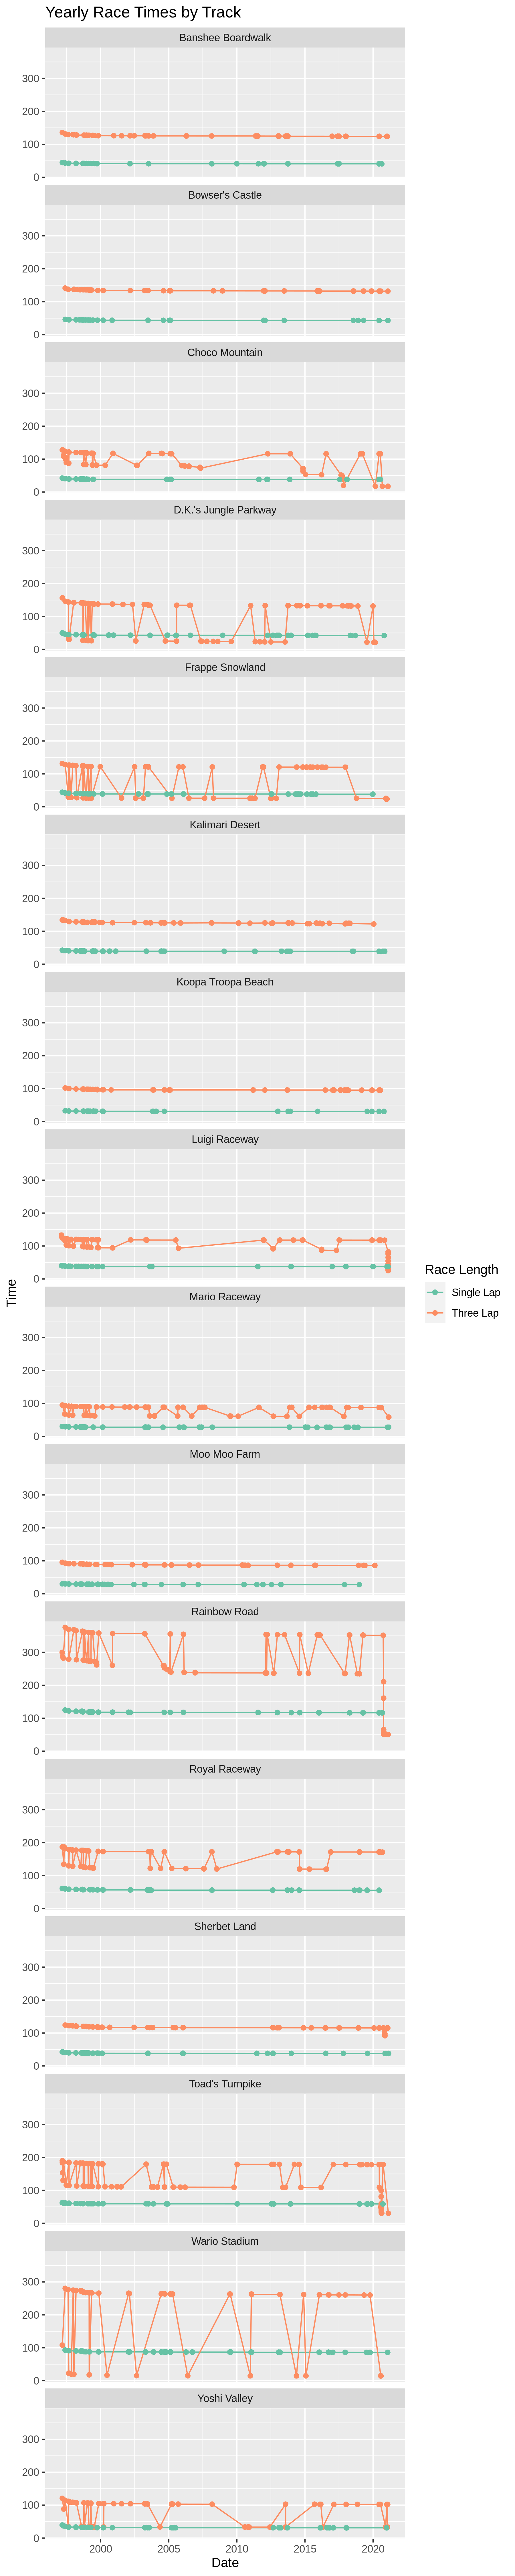

In [8]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 30)
p3 = ggplot(mario, aes(x = date, y = time, color=type))

p3 = p3 + geom_point() + geom_line()

p3 = p3 + ylab("Time") + xlab("Date") + 
          ggtitle("Yearly Race Times by Track") + 
          labs(color='Race Length') 

p3 = p3 + geom_point(aes(y=time, x=date))

p3 = p3 + facet_wrap(~track, ncol=1)

p3 = p3 + scale_color_brewer(palette="Set2")

p3

In [10]:
mario3 = mario %>% 
        filter(type=="Single Lap") %>% 
        group_by(track) %>% 
        summarize(min_time = min(time)) %>%
        arrange(min_time)

mario4 = mario %>% 
        filter(type=="Single Lap") %>% 
        group_by(track) %>% 
        summarize(max_time = max(time)) %>%
        arrange(max_time)

mario_wide_single = mario3 %>% left_join(mario4, by = "track")


In [11]:
mario_long_single = mario_wide_single %>% 
            pivot_longer(cols = c(min_time, max_time)) %>% 
            arrange(name, value) %>% 
            mutate(track = fct_inorder(track))

Another aspect to consider is the range of slowest world record time to fastest world record time for each track. This chart reflects the duration of the race along with the amount of improvement for each race track. The single lap races should be considered separately from the three lap races. The single lap races have fairly small ranges of improvement from the minimum world record to the maximum world record time. However, the ranges in times for each track are much larger. This could be due to the presense of shortcuts. As a consequence, further visualizations would be required to create plots that separate times for races in which racers used shortcuts, and in which they did not. 

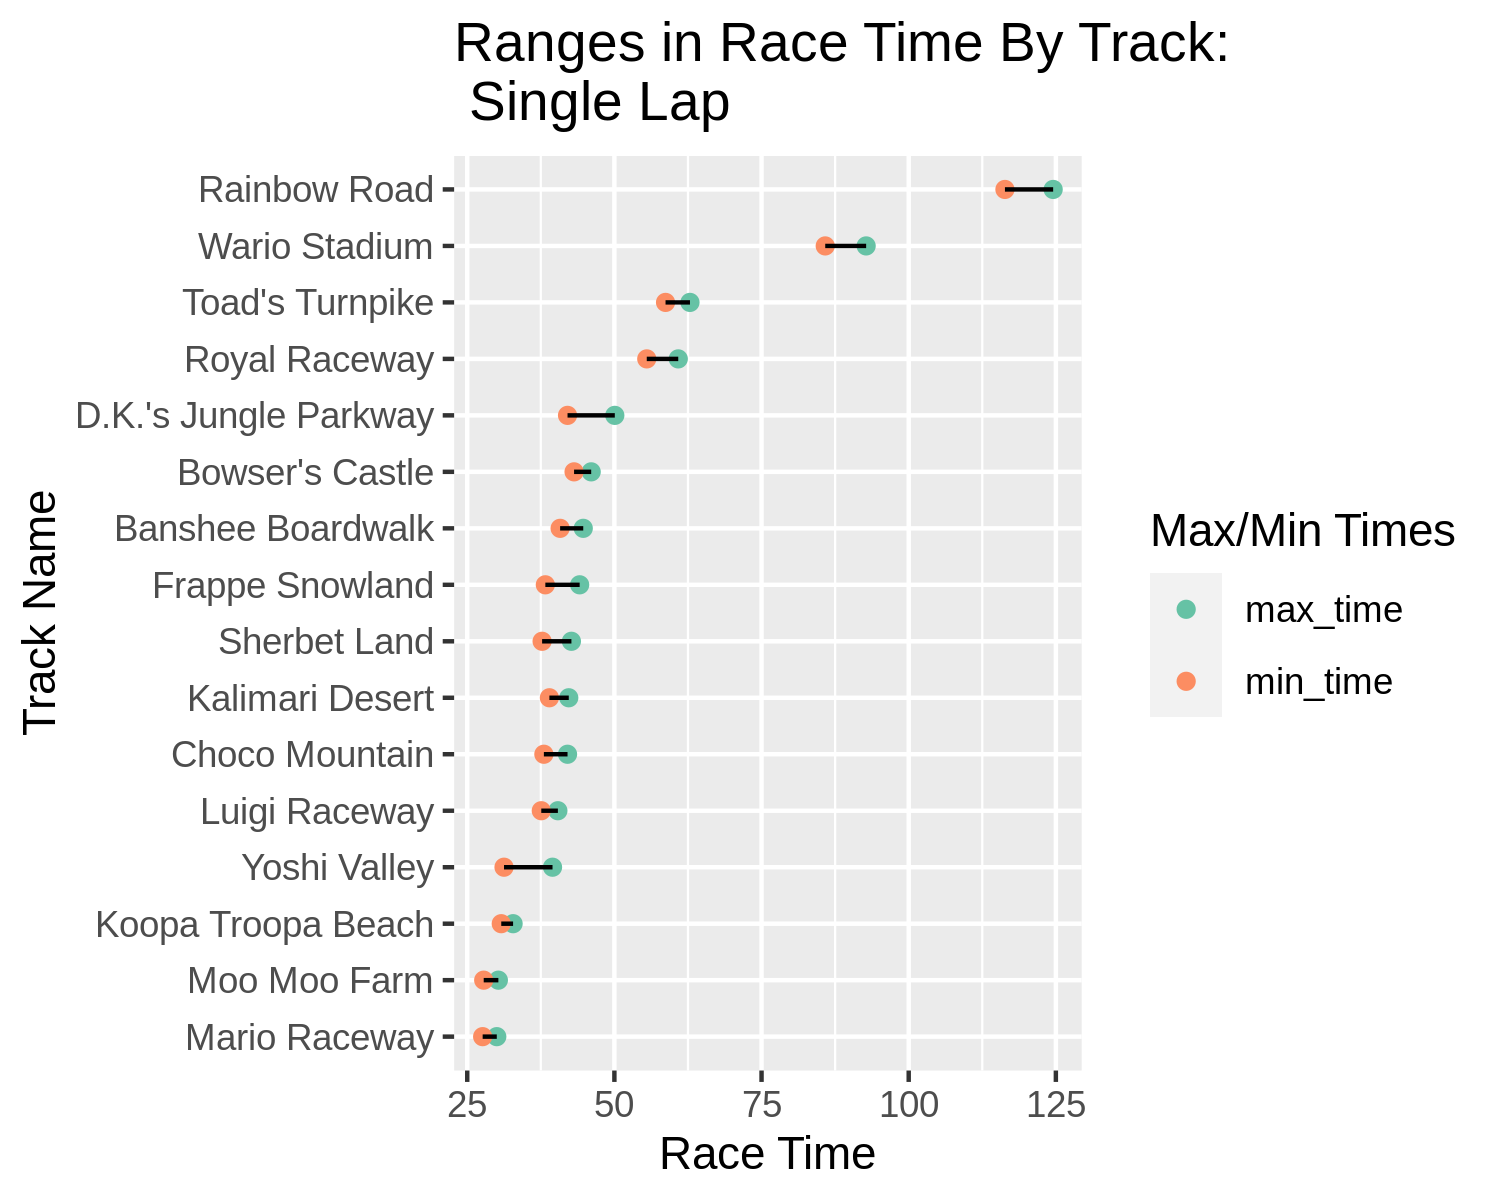

In [13]:
options(repr.plot.res = 300, repr.plot.width = 5, repr.plot.height = 4)

p4 = ggplot(mario_long_single, aes(x = value, y = track))

p4 = p4 + geom_point(aes(color = name))

p4 = p4 + ylab("Track Name") + 
          xlab("Race Time") + 
          labs(color='Max/Min Times') +
          ggtitle("Ranges in Race Time By Track: \n Single Lap")

p4 = p4 + geom_segment(data = mario_wide_single, mapping = aes(x = min_time, 
                                                     xend = max_time, 
                                                     y = track, 
                                                     yend = track))
p4 = p4 + scale_color_brewer(palette = "Set2")


p4

In [14]:
mario5 = mario %>% 
        filter(type=="Three Lap") %>% 
        group_by(track) %>% 
        summarize(min_time = min(time)) %>%
        arrange(min_time)

mario6 = mario %>% 
        filter(type=="Three Lap") %>% 
        group_by(track) %>% 
        summarize(max_time = max(time)) %>%
        arrange(max_time)

mario_wide_three = mario5 %>% left_join(mario6, by = "track")

mario_long_three = mario_wide_three %>% 
            pivot_longer(cols = c(min_time, max_time)) %>% 
            arrange(name, value) %>% 
            mutate(track = fct_inorder(track))

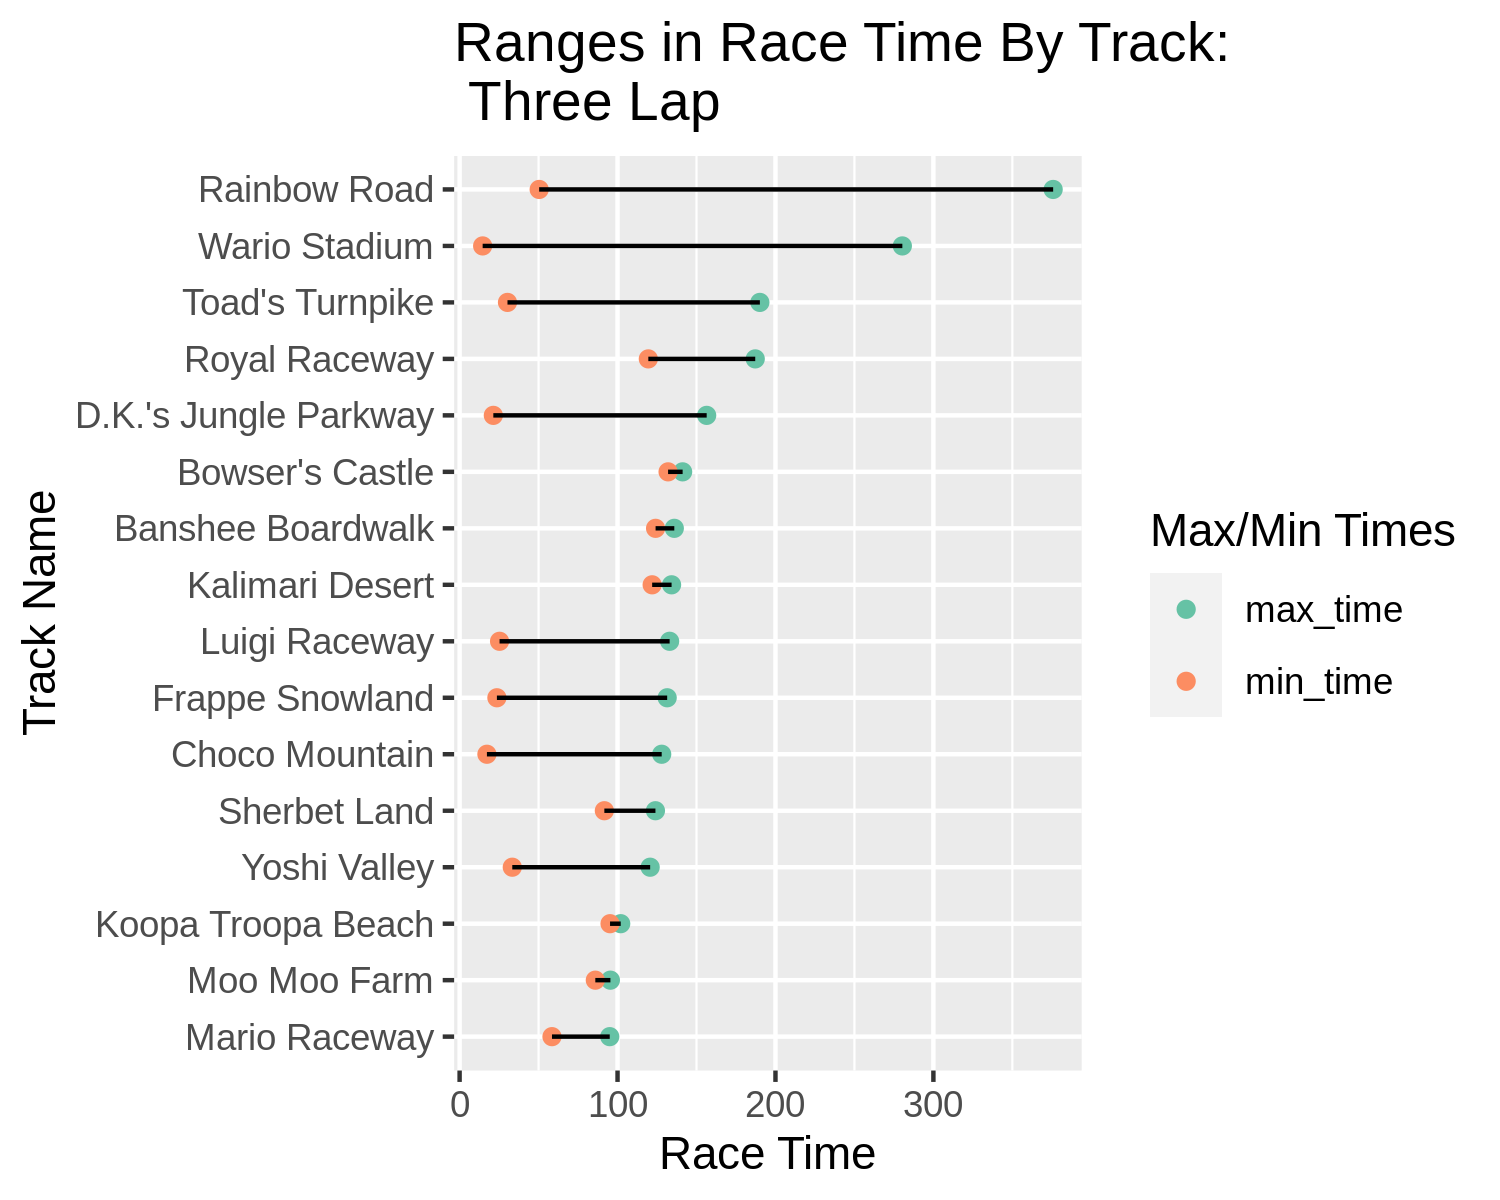

In [15]:
options(repr.plot.res = 300, repr.plot.width = 5, repr.plot.height = 4)

p5 = ggplot(mario_long_three, aes(x = value, y = track))

p5 = p5 + geom_point(aes(color = name))

p5 = p5 + ylab("Track Name") + 
          xlab("Race Time") + 
          labs(color='Max/Min Times') +
          ggtitle("Ranges in Race Time By Track: \n Three Lap")

p5 = p5 + geom_segment(data = mario_wide_three, mapping = aes(x = min_time, 
                                                     xend = max_time, 
                                                     y = track, 
                                                     yend = track))
p5 = p5 + scale_color_brewer(palette = "Set2")


p5